# Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML # allows for display to work on DataFrame

## Experiment 1

In [2]:
num_p = 8 # number of threads
direc = "results/"
files = ["decTree_SEQ_exp-1.csv","decTree_SEQ_B_exp-1.csv","decTree_PAR_exp-1.csv"]

### read in data:

In [3]:

# creates a map of filenames to a dataframe, and displays the dataframes

all_df = []
for f in files:
    df = pd.read_csv(direc+f)
    if "SEQ" not in f:
        df = df[-1*num_p:]
    all_df.append(df)
    print(f)
    
    # get speed up in parallel file
    if f is files[2]:
        df["speed-up"] = all_df[0]["time"][len(all_df[0])-1] / df["time"]
        
    if f is files[1]:
        df["speed-up"] = all_df[0]["time"] / df["time"]
    
    display(df)

file_df = dict(zip(files,all_df))

decTree_SEQ_exp-1.csv


,rows,time
0,2000,10.5646
1,4000,54.8604
2,6000,135.0210
3,8000,221.6620


decTree_SEQ_B_exp-1.csv


,rows,time,speed-up
0,2000,0.000435,24293.417649
1,4000,0.000768,71437.835473
2,6000,0.001119,120672.982393
3,8000,0.001612,137511.709420


decTree_PAR_exp-1.csv


,threads,rows,time,speed-up
24,1,8000,221.7540,0.999585
25,2,8000,146.4120,1.513961
26,3,8000,109.7810,2.019129
27,4,8000,89.9062,2.465481
28,5,8000,85.4729,2.593360
29,6,8000,79.4276,2.790743
30,7,8000,80.9437,2.738471
31,8,8000,79.8857,2.774739


In [4]:
for f in files:   
    print("-"*10,f,"-"*10)
    print(all_df[files.index(f)].to_latex())


---------- decTree_SEQ_exp-1.csv ----------
\begin{tabular}{lrr}
\toprule
{} &  rows &      time \\
\midrule
0 &  2000 &   10.5646 \\
1 &  4000 &   54.8604 \\
2 &  6000 &  135.0210 \\
3 &  8000 &  221.6620 \\
\bottomrule
\end{tabular}

---------- decTree_SEQ_B_exp-1.csv ----------
\begin{tabular}{lrrr}
\toprule
{} &  rows &      time &       speed-up \\
\midrule
0 &  2000 &  0.000435 &   24293.417649 \\
1 &  4000 &  0.000768 &   71437.835473 \\
2 &  6000 &  0.001119 &  120672.982393 \\
3 &  8000 &  0.001612 &  137511.709420 \\
\bottomrule
\end{tabular}

---------- decTree_PAR_exp-1.csv ----------
\begin{tabular}{lrrrr}
\toprule
{} &  threads &  rows &      time &  speed-up \\
\midrule
24 &        1 &  8000 &  221.7540 &  0.999585 \\
25 &        2 &  8000 &  146.4120 &  1.513961 \\
26 &        3 &  8000 &  109.7810 &  2.019129 \\
27 &        4 &  8000 &   89.9062 &  2.465481 \\
28 &        5 &  8000 &   85.4729 &  2.593360 \\
29 &        6 &  8000 &   79.4276 &  2.790743 \\
30 &        

### Calculate SpeedUp and Efficiency

### Runtime Plots

In [5]:
def csv_to_ex(f):
    return "_".join(f.split('_')[:-1])

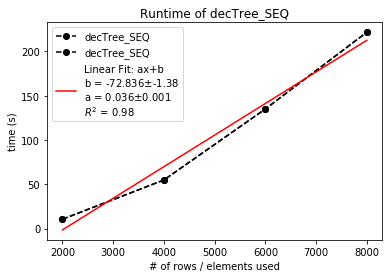

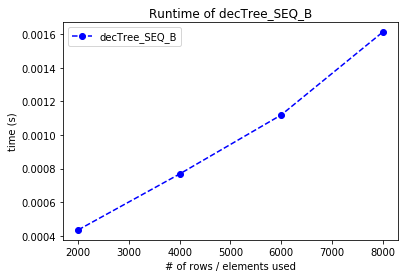

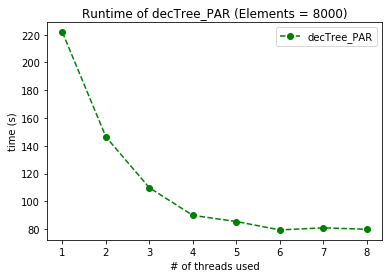

In [8]:
colors = ["k","b","g","m"]

count = 0
for f in files:

    
    
    if "SEQ" in f:
        plt.title("Runtime of "+csv_to_ex(f))
        plt.plot(file_df[f]["rows"],file_df[f]["time"],colors[files.index(f)]+"--o",label=csv_to_ex(f))
        plt.xlabel("# of rows / elements used")
        plt.ylabel("time (s)")
        
        if f is files[0]:
            plot_fit(plt.gca(),file_df[f]["rows"],file_df[f]["time"])
        
        plt.legend()
        
    else:
        plt.title("Runtime of "+csv_to_ex(f)+" (Elements = "+str(np.max(file_df[files[0]]["rows"])) +")")
        plt.plot(file_df[f]["threads"],file_df[f]["time"],colors[files.index(f)]+"--o",label=csv_to_ex(f))
        plt.xlabel("# of threads used")
        plt.ylabel("time (s)")
        plt.legend()
        
    plt.savefig("results/runtime_"+csv_to_ex(f)+".pdf")
    plt.show()

* compute speedup and efficieny

In [9]:
def get_rsq(x,y,fc):
    '''
    RETURNS: R^2 Goodness of fit parameter
    PARAMETERS:
        x:  x-values being fit
        y:  y-values being fit
        fc: fit coeficents
    '''
    y_fit = fc[0] * x + fc[1] # fit values
    y_resid = y - y_fit       # residual
    sum_sqr_resid = sum(pow(y_resid,2)) # sum of resid^2
    SStotal = len(y) * np.var(y)
    return 1-sum_sqr_resid / SStotal

def plot_fit(ax,x,y):
    '''
    PARAMETERS:
    1. ax: axis to plot on
    2. x:  x-values for fit
    3. y:  y-values for fit
    
    Uses: coef*(1-R^2): to calculate the error in the coeficents
    '''
    
    # fit coefiecents
    fc = np.polyfit(x,y,1)
    
    # R^2
    rsq = get_rsq(x,y,fc)
    
    # Strings For Label [Determines Significant Figures]
    str_b  = str(round(fc[1],3))
    str_b_unc = str(round(fc[1]*(1-rsq),3))
    
    str_a  = str(round(fc[0],3))
    str_a_unc = str(round(fc[0]*(1-rsq),3))
    
    str_rr = str(round(rsq,2))
    
    # Plot Fit Line
    ax.plot(x, np.polyval(fc,x),'r',
            label="Linear Fit: ax+b\n"+
            "b = "+str_b+"$\pm$"+str_b_unc+"\n"+
            "a = "+str_a+"$\pm$"+str_a_unc+"\n"+
            "$R^{2}$ = "+str_rr
           )
    return rsq

def plot_fit_2(ax,x,y):
    '''
    PARAMETERS:
    1. ax: axis to plot on
    2. x:  x-values for fit
    3. y:  y-values for fit
    
    Uses: coef*(1-R^2): to calculate the error in the coeficents
    '''
    
    # fit coefiecents
    fc = np.polyfit(x,y,1)
    
    # R^2
    rsq = get_rsq(x,y,fc)
    
    # Strings For Label [Determines Significant Figures]
    str_b  = str(round(fc[1],3))
    str_b_unc = str(round(fc[1]*(1-rsq),3))
    
    str_a  = str(round(fc[0],3))
    str_a_unc = str(round(fc[0]*(1-rsq),3))
    
    str_rr = str(round(rsq,2))
    
    # Plot Fit Line
    ax.plot(x, np.polyval(fc,x),'k',
            label="Linear Fit: ax+b\n"+
            "b = "+str_b+"$\pm$"+str_b_unc+"\n"+
            "a = "+str_a+"$\pm$"+str_a_unc+"\n"+
            "$R^{2}$ = "+str_rr
           )
    return rsq



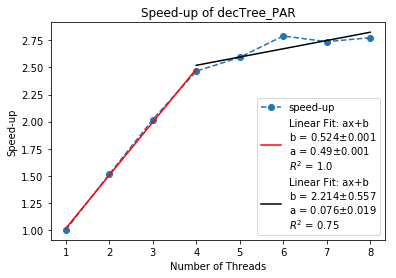

In [10]:
df = file_df[files[2]]
x = df["threads"]
y = df["speed-up"]

plt.plot(x, y, "--o",label="speed-up")

ax = plt.gca()
plot_fit(ax,x[0:4],y[0:4])
plot_fit_2(ax,x[3:],y[3:])


plt.xlabel("Number of Threads")
plt.ylabel("Speed-up")
plt.title("Speed-up of "+csv_to_ex(files[2]))
plt.legend()

plt.savefig("results/speedup_"+csv_to_ex(files[2])+".pdf")

plt.show()


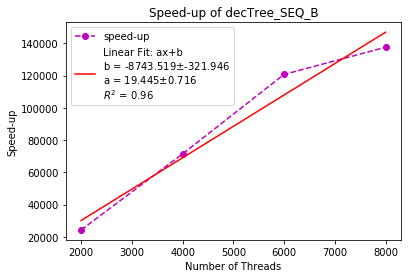

In [11]:
df = file_df[files[1]]
x = df["rows"]
y = df["speed-up"]

plt.plot(x, y, "m--o",label="speed-up")

ax = plt.gca()
plot_fit(ax,x,y)

plt.xlabel("Number of Threads")
plt.ylabel("Speed-up")
plt.title("Speed-up of "+csv_to_ex(files[1]))
plt.legend()

plt.savefig("results/speedup_"+csv_to_ex(files[1])+".pdf")

plt.show()